In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
a = pd.read_csv('C:/csv/Regressao/wine_dataset.csv')

In [3]:
arq = a.head()

In [4]:
a.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
#style = é o que queremos descobrir pode ser classificado como red ou white
y = a['style']

#tirando o style
X = a.drop('style', axis=1)

In [6]:
#dividindo treino, base de teste = 30
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [7]:
#algoritmo
modelo = ExtraTreesClassifier()

In [8]:
#fitando os treinos
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [9]:
#checando score
resultado = modelo.score(X_teste, y_teste)
print("Acurácia:", resultado)

Acurácia: 0.9969230769230769


In [10]:
real = y_teste[300:307]
print(real)
#trazendo dados randomizados reais     

5307    white
733       red
3242    white
546       red
1486      red
4555    white
5862    white
Name: style, dtype: object


In [11]:
#chamando X_teste pra testar a o acerto entre 300:307
pre = modelo.predict((X_teste[300:307]))#Chamando tudo menos o estilo
print(pre)

['white' 'red' 'white' 'red' 'red' 'white' 'white']


In [12]:
#Árvores de Regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#gerando dataset de Kyphosis


#Definindo os parâmetros
num_rows = 200
kyphosis_states = ['present', 'absent']
age_min, age_max = 1, 150
number_min, number_max = 1, 10
start_min, start_max = 1, 20

# Gerando os dados
np.random.seed(42)  # Para reprodutibilidade
kyphosis = np.random.choice(kyphosis_states, num_rows)
age = np.random.randint(age_min, age_max + 1, num_rows)
number = np.random.randint(number_min, number_max + 1, num_rows)
start = np.random.randint(start_min, start_max + 1, num_rows)

# Criando o DataFrame
data = {
    "Kyphosis": kyphosis,
    "Age": age,
    "Number": number,
    "Start": start
}

kyphosis_df = pd.DataFrame(data)

# Mostrando as primeiras linhas do DataFrame
print(kyphosis_df.head())

  Kyphosis  Age  Number  Start
0  present   63       2      5
1   absent   96       2      5
2  present   52       7      6
3  present   96       6     19
4  present  132       3      8


In [14]:
df = kyphosis_df

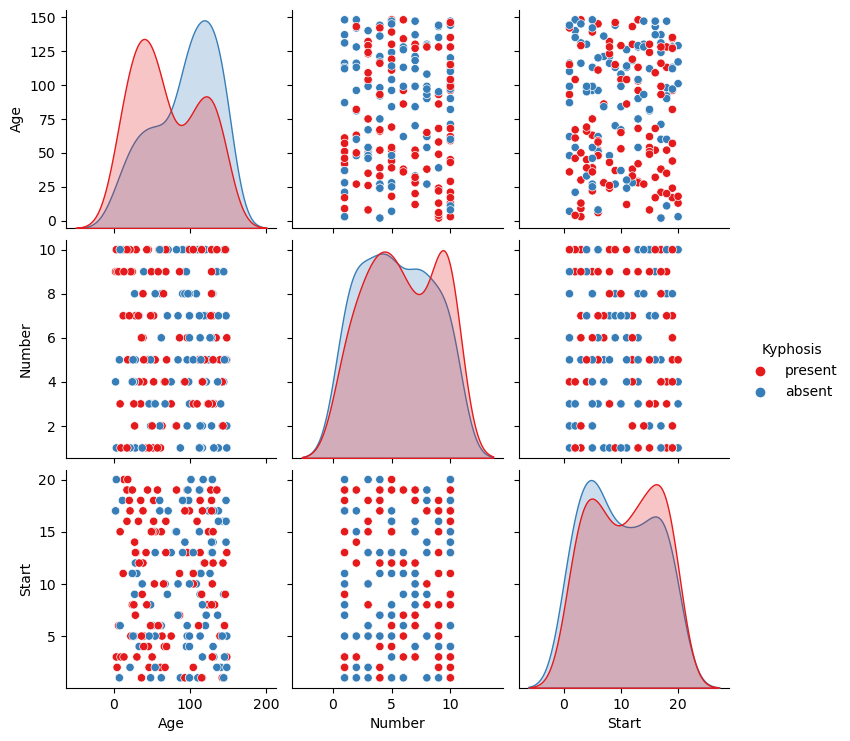

In [15]:
#plotando com seaborn
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [16]:
#dividindo a base para treino e teste
from sklearn.model_selection import train_test_split

In [17]:
#X = restante, y = kyphosis
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']   

In [18]:
#base de teste com tamanho de 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [19]:
#árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [20]:
#modelo
dtree = DecisionTreeClassifier()

In [21]:
#fitando os treinos
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
#comparando
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
#checando predições do Y teste
print(classification_report(y_test,predictions))

#absent = ausente
#present = presente

              precision    recall  f1-score   support

      absent       0.71      0.69      0.70        32
     present       0.66      0.68      0.67        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



In [25]:
#testando com random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #especificando quantas arvores
rfc.fit(X_train, y_train)   

RandomForestClassifier()

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
#verificando report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.71      0.69      0.70        32
     present       0.66      0.68      0.67        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60

